In [246]:
!pip install plotly --q

In [247]:
!pip install fredapi --q

In [248]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_api_key = os.getenv('API_KEY')

## 1. Create The Fred Object

In [250]:
fred = Fred(fred_api_key)

## 2. Search for economic data

In [251]:
sp_search = fred.search('S&P',order_by='popularity')

In [252]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-09-12   2024-09-12   
CSUSHPINSA          CSUSHPINSA     2024-09-12   2024-09-12   
SP500                    SP500     2024-09-12   2024-09-12   
MEHOINUSA672N    MEHOINUSA672N     2024-09-12   2024-09-12   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-09-12   2024-09-12   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-09-10  Daily, Close   
CSUSHPINSA            1987-01-01      2024-06-01       Monthly   
SP500                 2014-09-12      2024-09-11  Daily, Close   
MEHOINUSA672N         1984-01-01      2023-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-09-10  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-09-11 08:42:12-05:00   
CSUSHPINSA                           NSA  2024-08-27 08:12:01-05:00   
SP500                                NSA  2024-09-11 19:30:49-05:00   
MEHOINUSA672N                        NSA  2024-09-11 09:45:01-05:00   
BAMLH0A0HYM2EY                       NSA  2024-09-11 08:42:15-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

## 3. Pull Raw Data

In [253]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

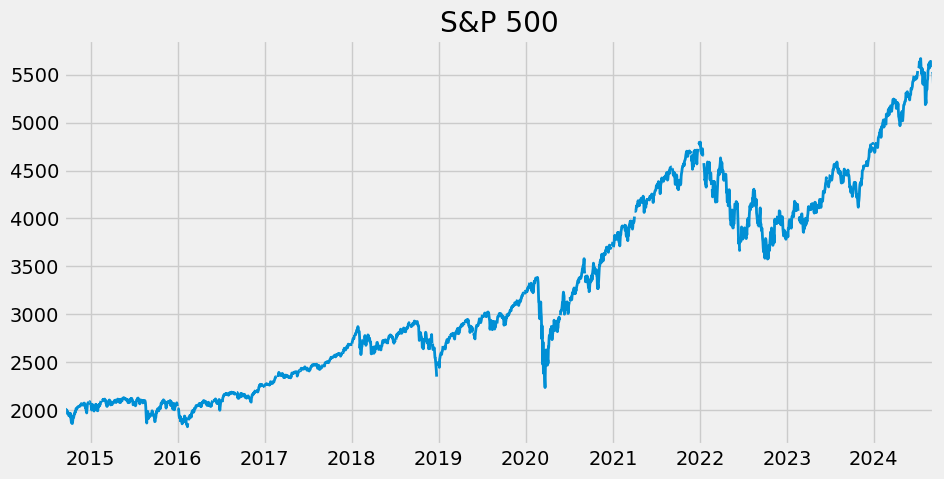

In [254]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

## 4. Pull and Join Multiple Data Series 

In [255]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df =  unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [256]:
# Before dropping data, finding if the data is necessary or relevant for the analysis 
cols = unemp_results.columns


In [257]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

In [258]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis=1).drop(['LNS14000006', 'M0892AUSM156SNBR','LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'LNS14000001',                               'LNS14027660', 'LNS14027662', 'LNS14024887', 'LRUN64TTUSM156S', 'LNS14032183', 'LNS14000012', 'LNS14027659', 'LASMT261982000000003', 'LNS14000060', 'LNS14000028', 'LASMT391746000000003',
                  'LNS14000018', 'LNS14000036', 'LNS14000032', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689','LNS14100000', 'LNS14000315', 'LNS14000029', 'LRHUTTTTUSM156S', 'LNS14024230', 
                  'LNS14000025', 'LNS14000061', 'LRUNTTTTUSM156S', 'LNS14000026', 'LNS14000048', 'LNS14000089','M08311USM156SNBR', 'LNS14000150']
                  ,axis=1) 

In [259]:
unemp_results


UNRATE  CAUR  TXUR  NYUR  U2RATE  FLUR  PAUR  OHUR  MIUR  ALUR  \
1929-04-01     NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01     NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01     NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01     NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01     NaN   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   
...            ...   ...   ...   ...     ...   ...   ...   ...   ...   ...   
2024-04-01     3.9   5.3   4.0   4.2     1.9   3.3   3.4   4.0   3.9   3.1   
2024-05-01     4.0   5.2   4.0   4.2     1.9   3.3   3.4   4.2   3.9   3.0   
2024-06-01     4.1   5.2   4.0   4.2     1.9   3.3   3.4   4.4   4.1   2.9   
2024-07-01     4.3   5.2   4.1   4.3     2.1   3.3   3.4   4.5   4.4   2.8   
2024-08-01     4.2   NaN   NaN   NaN     2.0   NaN   NaN   NaN   NaN   NaN   

            ...  KSUR  WYUR  DEUR  VTUR  SDUR  CMWRUR  CSOUUR  CNERUR  CWSTUR  \
1929-04-01  ...   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   
1929-05-01  ...   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   
1929-06-01  ...   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   
1929-07-01  ...   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   
1929-08-01  ...   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   
...         ...   ...   ...   ...   ...   ...     ...     ...     ...     ...   
2024-04-01  ...   2.8   2.8   3.9   2.1   2.0     3.6     3.5     3.9     4.6   
2024-05-01  ...   2.9   2.9   3.9   2.1   2.0     3.7     3.5     3.9     4.6   
2024-06-01  ...   3.0   2.9   4.0   2.1   2.0     3.8     3.5     3.8     4.5   
2024-07-01  ...   3.2   2.9   4.1   2.1   2.0     4.0     3.6     3.9     4.6   
2024-08-01  ...   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   

            CNEWUR  
1929-04-01     NaN  
1929-05-01     NaN  
1929-06-01     NaN  
1929-07-01     NaN  
1929-08-01     NaN  
...            ...  
2024-04-01     3.3  
2024-05-01     3.4  
2024-06-01     3.3  
2024-07-01     3.4  
2024-08-01     NaN  

[1133 rows x 59 columns]

In [260]:
unemp_states = unemp_results.drop('UNRATE', axis=1)
# Extracting state names from the string and replacing state code abbreviations with full state names.
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
# List Comprehension
unemp_states.columns = [id_to_state [c] for c in unemp_states.columns]
unemp_states = unemp_states.drop('Unemployment Rate - Job Losers (U-2)', axis=1)

<Axes: >

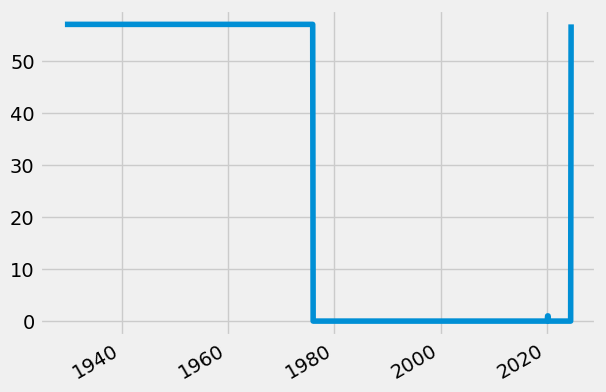

In [261]:
# Plotting the missing values to evaluate whether removing null entries is suitable.
unemp_states.isna().sum(axis=1).plot()

<Axes: >

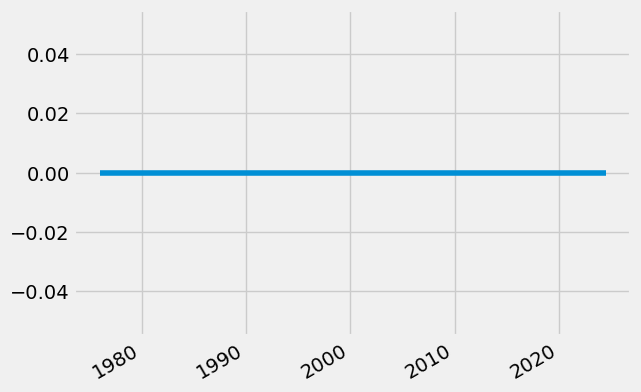

In [262]:
# Visualizing the data after removing null values.
unemp_states =  unemp_states.dropna()
unemp_states.isna().sum(axis=1).plot()

In [263]:
# Plot States Unemployment Rate
px.line(unemp_states)

## Pull April 2020 Unemployment Rate Per State 

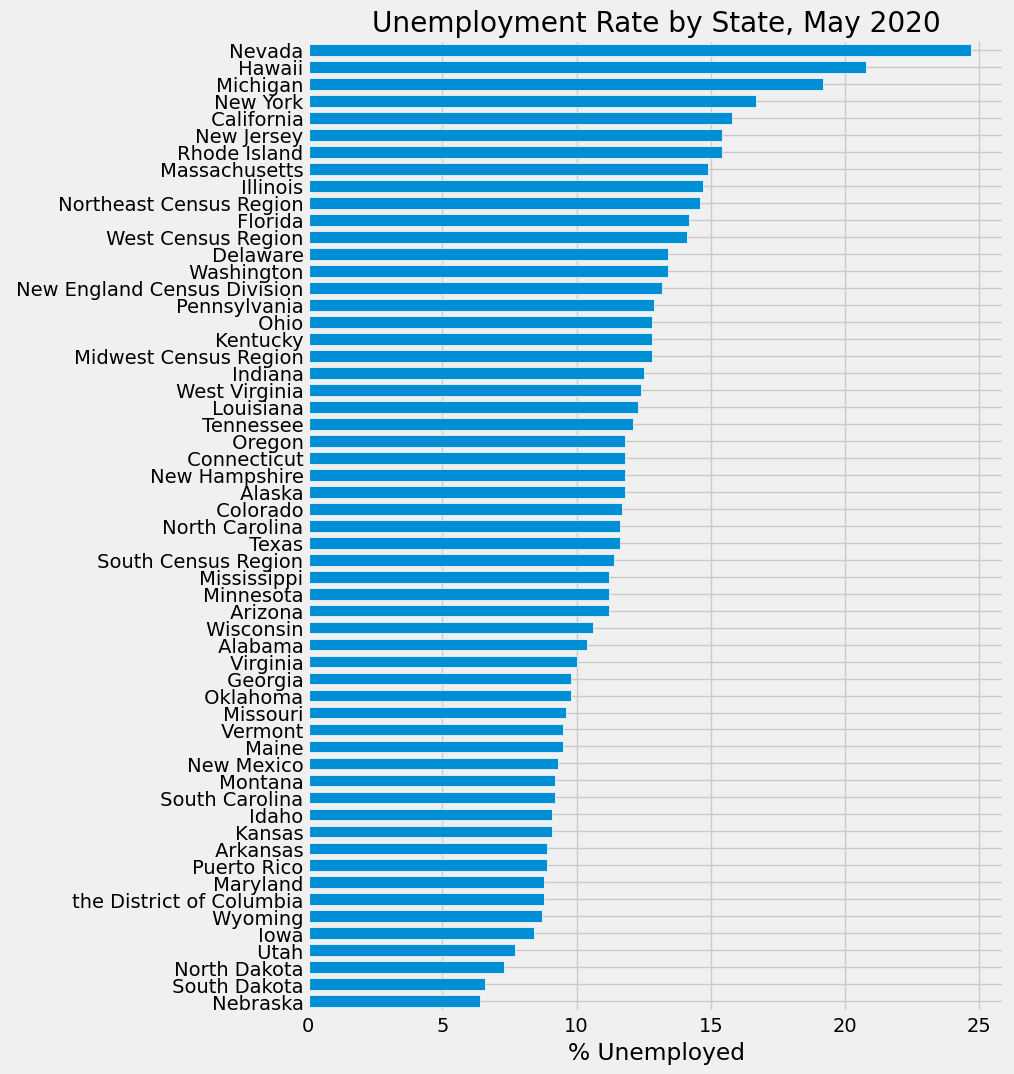

In [264]:
# Plotting the Unemployment Rate by State (May 2020)
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8,12), width=0.7, edgecolor='white',
          title= 'Unemployment Rate by State, May 2020' )
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

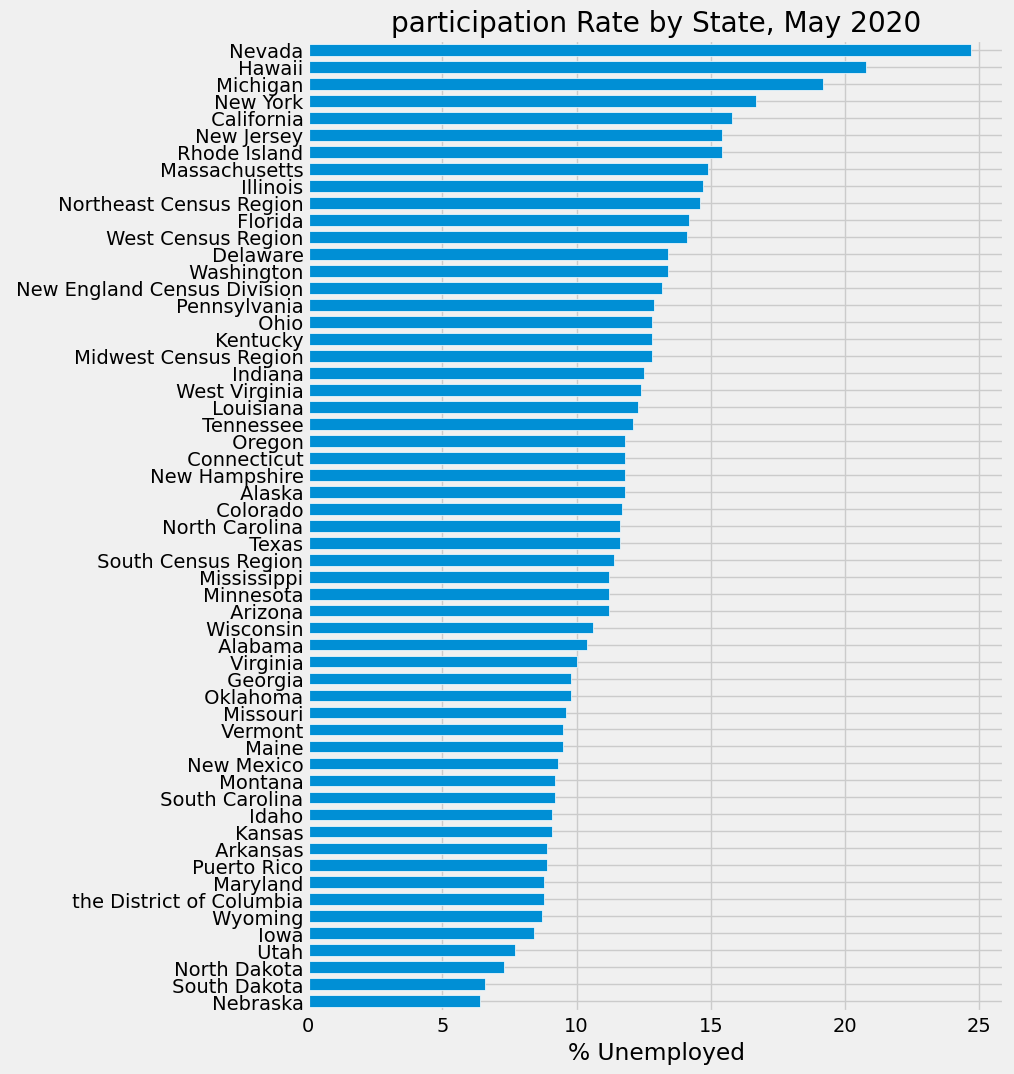

In [340]:
ax = part_states.loc[part_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8,12), width=0.7, edgecolor='white',
          title= 'participation Rate by State, May 2020' )
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pulling Participation Rate

In [273]:
part_df = fred.search('participation rate state' , filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')


In [288]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for', '') \
    .to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
columns_to_drop = [key for key, value in part_id_to_state.items() if not value.startswith(' ')]
part_states= part_states.drop(columns=columns_to_drop)
part_states.columns = [part_id_to_state [c] for c in part_states.columns]

In [285]:
part_id_to_state

{'CIVPART': 'Labor Force Participation Rate',
 'LNS11300060': 'Labor Force Participation Rate - 25-54 Yrs.',
 'LNS11300002': 'Labor Force Participation Rate - Women',
 'LNS11300001': 'Labor Force Participation Rate - Men',
 'LNS11324230': 'Labor Force Participation Rate - 55 Yrs. & over',
 'LNS11300012': 'Labor Force Participation Rate - 16-19 Yrs.',
 'LNS11300006': 'Labor Force Participation Rate - Black or African American',
 'LRAC25MAUSM156S': 'Infra-Annual Labor Statistics: Labor Force Participation Rate Male: From 25 to 54 Years for United States',
 'LNS11300036': 'Labor Force Participation Rate - 20-24 Yrs.',
 'LRAC25FEUSM156S': 'Infra-Annual Labor Statistics: Labor Force Participation Rate Female: From 25 to 54 Years for United States',
 'LNS11327662': "Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'LBSSA06': ' California',
 'LNS11300028': 'Labor Force Participation Rate - 20 Yrs. & over, White Men',
 'LNS11300031': 'Labor Force Participation R

In [289]:
part_states

California  Alabama  New York  Michigan  Mississippi  Texas  \
1948-01-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-02-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-03-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-04-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-05-01         NaN      NaN       NaN       NaN          NaN    NaN   
...                ...      ...       ...       ...          ...    ...   
2024-04-01        62.0     57.5      61.3      62.3         53.7   64.2   
2024-05-01        62.0     57.5      61.3      62.3         53.8   64.2   
2024-06-01        62.0     57.5      61.3      62.3         54.0   64.3   
2024-07-01        62.0     57.5      61.3      62.4         54.2   64.4   
2024-08-01         NaN      NaN       NaN       NaN          NaN    NaN   

            Florida  Kentucky  Ohio  Wisconsin  ...  New Hampshire  Vermont  \
1948-01-01      NaN       NaN   NaN        NaN  ...            NaN      NaN   
1948-02-01      NaN       NaN   NaN        NaN  ...            NaN      NaN   
1948-03-01      NaN       NaN   NaN        NaN  ...            NaN      NaN   
1948-04-01      NaN       NaN   NaN        NaN  ...            NaN      NaN   
1948-05-01      NaN       NaN   NaN        NaN  ...            NaN      NaN   
...             ...       ...   ...        ...  ...            ...      ...   
2024-04-01     59.3      57.1  61.8       65.6  ...           65.5     65.5   
2024-05-01     59.1      57.3  61.9       65.6  ...           65.6     65.6   
2024-06-01     58.9      57.4  62.1       65.5  ...           65.6     65.7   
2024-07-01     58.8      57.6  62.3       65.5  ...           65.6     65.7   
2024-08-01      NaN       NaN   NaN        NaN  ...            NaN      NaN   

            Connecticut  North Dakota  South Dakota  Kansas  Rhode Island  \
1948-01-01          NaN           NaN           NaN     NaN           NaN   
1948-02-01          NaN           NaN           NaN     NaN           NaN   
1948-03-01          NaN           NaN           NaN     NaN           NaN   
1948-04-01          NaN           NaN           NaN     NaN           NaN   
1948-05-01          NaN           NaN           NaN     NaN           NaN   
...                 ...           ...           ...     ...           ...   
2024-04-01         64.6          69.0          67.6    66.1          64.7   
2024-05-01         64.7          68.9          67.5    66.1          64.9   
2024-06-01         64.6          68.9          67.5    66.1          65.1   
2024-07-01         64.4          68.9          67.5    66.1          65.2   
2024-08-01          NaN           NaN           NaN     NaN           NaN   

            District Of Columbia  Delaware  Wyoming  
1948-01-01                   NaN       NaN      NaN  
1948-02-01                   NaN       NaN      NaN  
1948-03-01                   NaN       NaN      NaN  
1948-04-01                   NaN       NaN      NaN  
1948-05-01                   NaN       NaN      NaN  
...                          ...       ...      ...  
2024-04-01                  72.8      60.1     63.0  
2024-05-01                  72.7      59.9     62.9  
2024-06-01                  72.6      59.8     63.0  
2024-07-01                  72.5      59.7     63.1  
2024-08-01                   NaN       NaN      NaN  

[920 rows x 51 columns]

<Axes: >

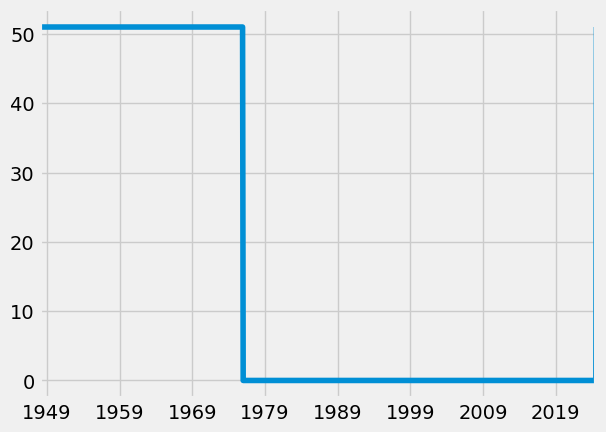

In [290]:
part_states.isna().sum(axis=1).plot()

<Axes: >

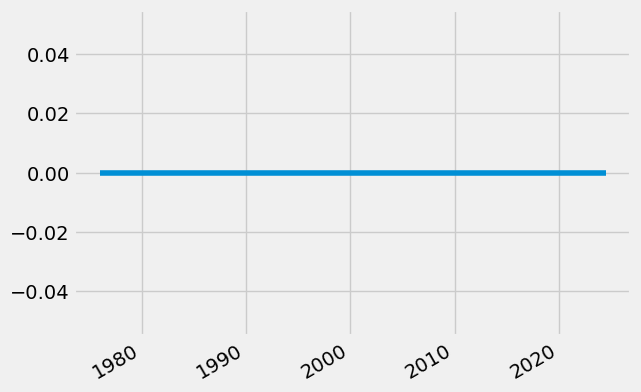

In [291]:
part_states =  unemp_states.dropna()
part_states.isna().sum(axis=1).plot()

# Plot Unemployment vs Participation

In [293]:
# First checking if all the columns matches in both dataframe

mismatch_in_unemp = [col for col in unemp_states.columns if col not in part_states.columns]
mismatch_in_part = [col for col in part_states.columns if col not in unemp_states.columns]

if mismatch_in_unemp or mismatch_in_part:
    print("Columns in unemp_stats but not in part_stats: ", mismatch_in_unemp)
    print("Columns in part_stats: ", mismatch_in_part)
else:
    print("Both DataFrames have matching column names")

Both DataFrames have matching column names


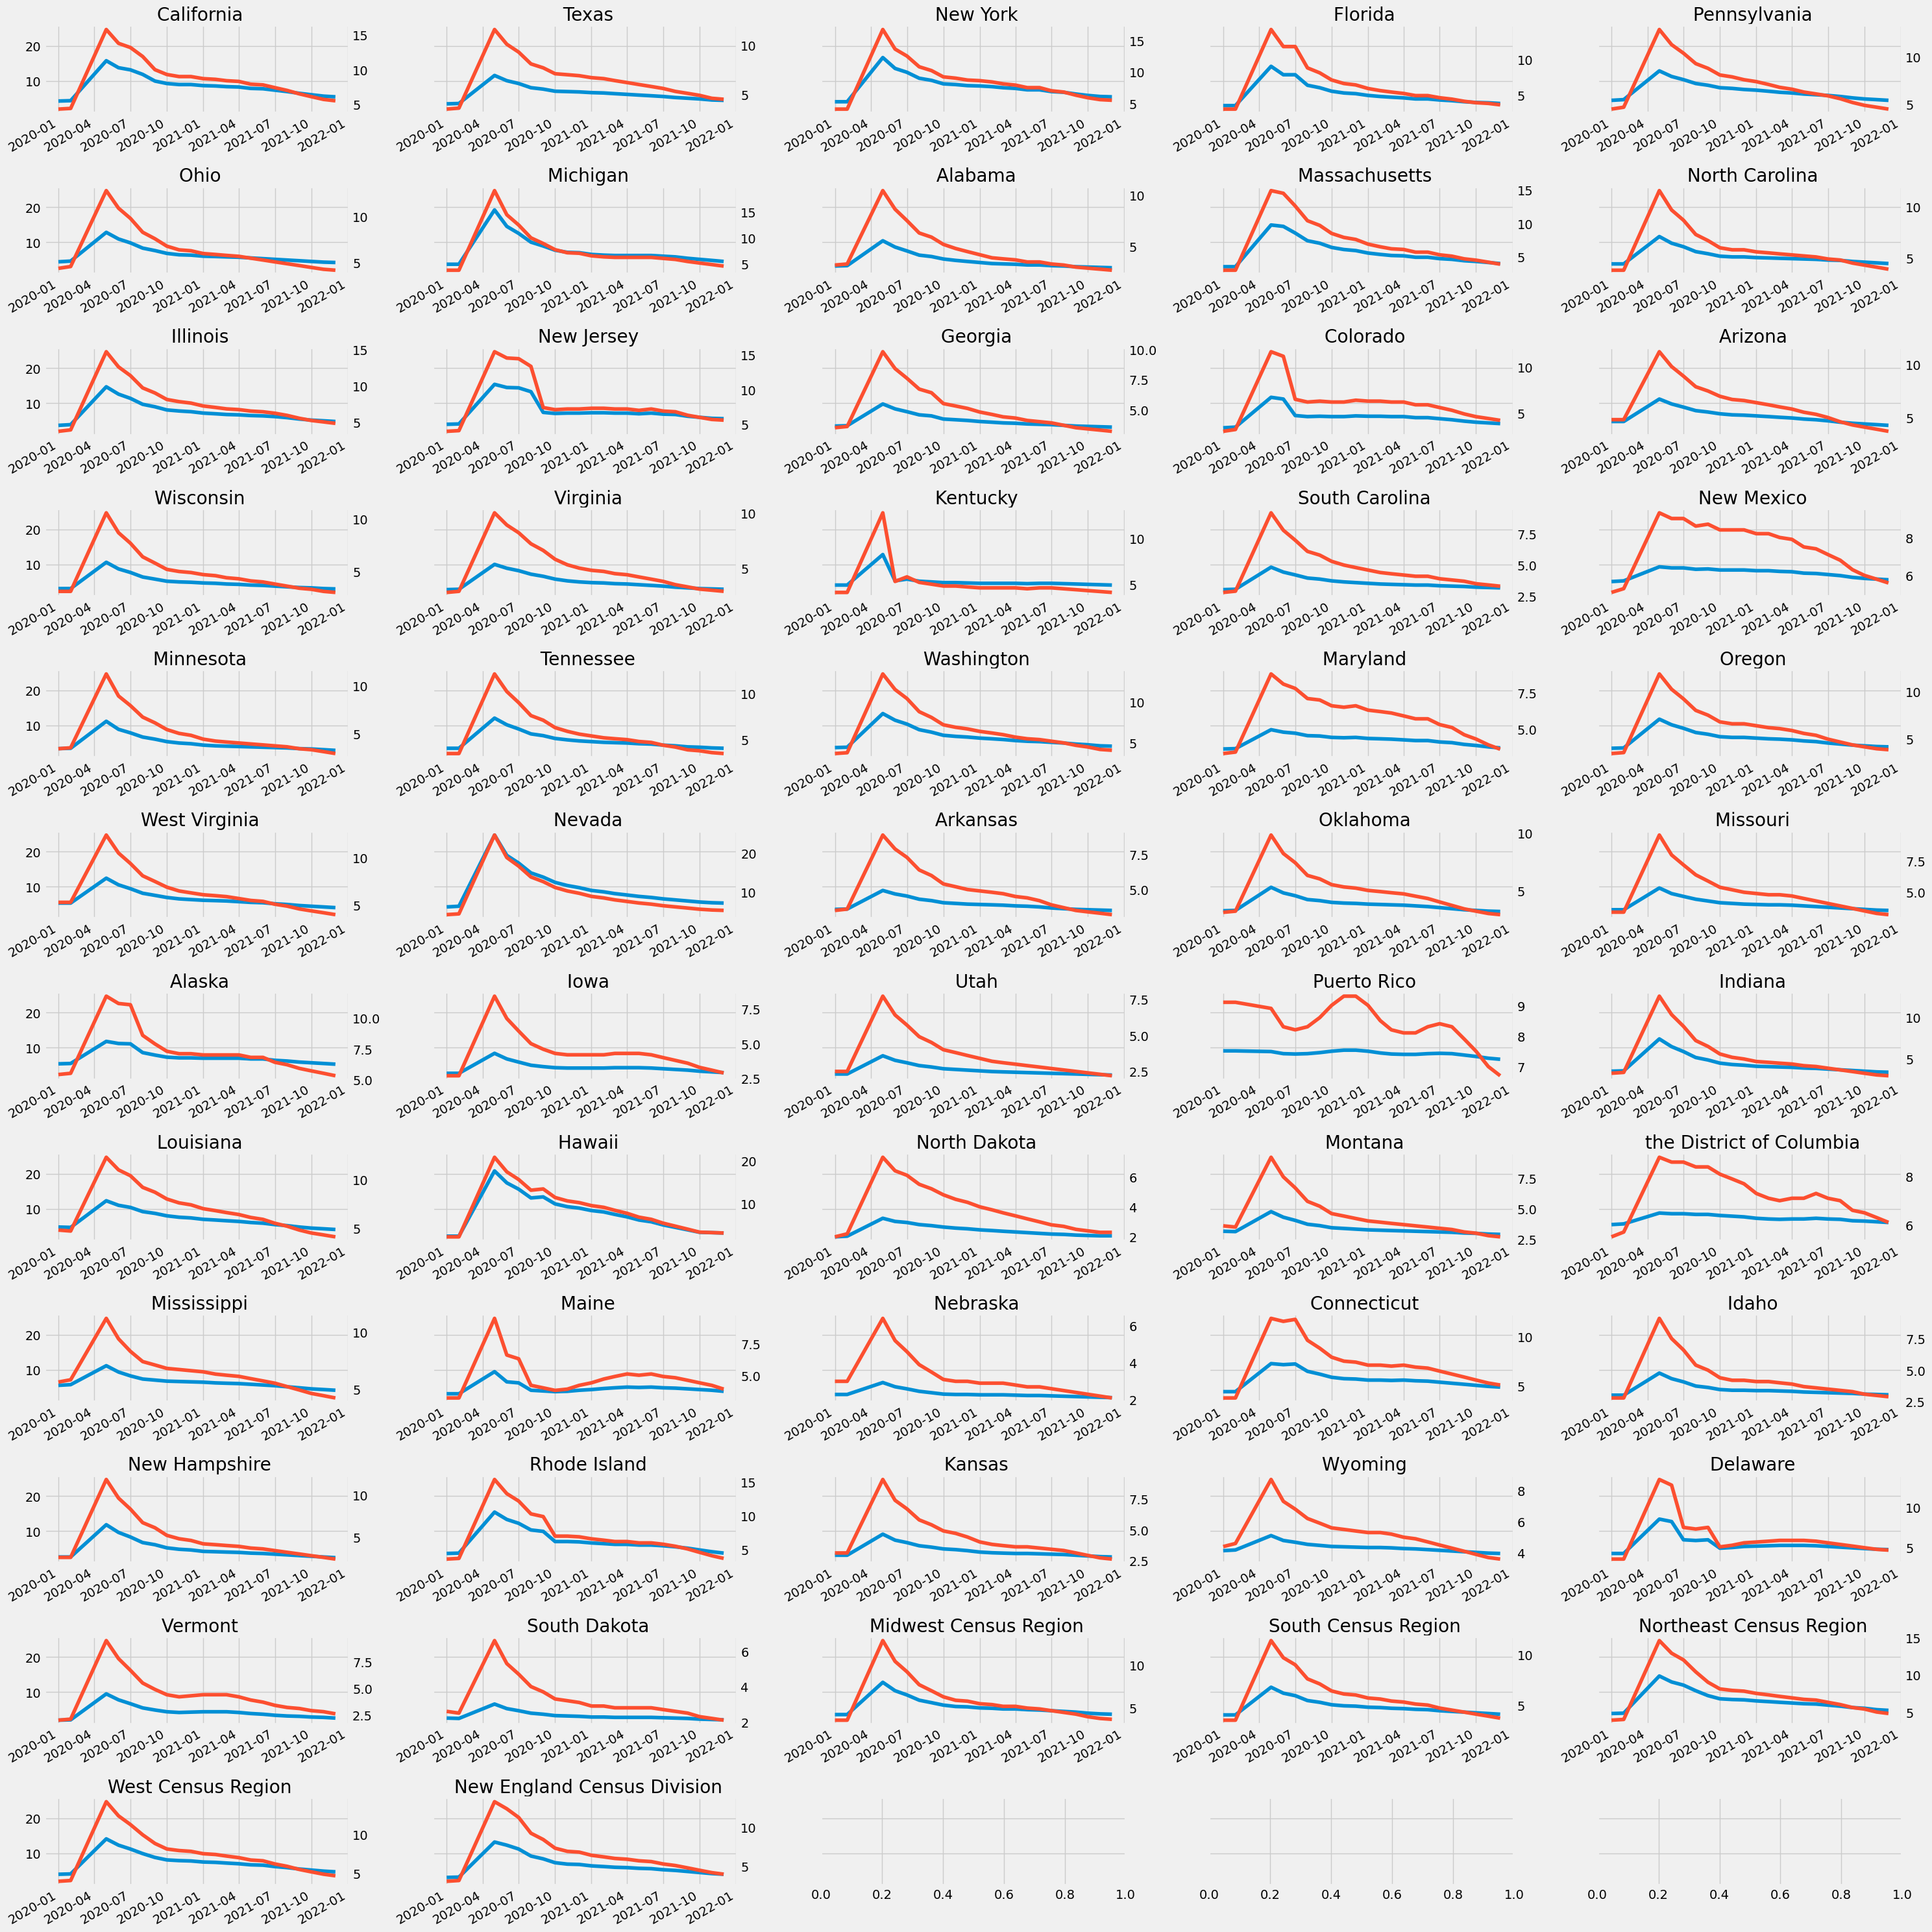

In [319]:
num_states = len(unemp_states.columns)
rows = (num_states // 5) + 1 # Create enough rows based on number of states  
fig, axs = plt.subplots(rows, 5, figsize=(30, 30), sharey=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
            .plot(ax=axs[i], label="Unemployment")
    part_states.query('index >= 2020 and index < 2022')[state]\
       .plot(ax=ax2, label="Participation", color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

## Plotting using plotly

In [310]:
px.line(part_states)

In [326]:
unemp_filtered = unemp_states[(unemp_states.index >= '2020-01-02') & (unemp_states.index <= '2022-01-01')]
part_filtered = part_states[(part_states.index >='2020-01-01') & (part_states.index <= '2022-01-01')]

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('Unemployment Rates', 'Participation Rates'))

for state in unemp_filtered.columns:
    fig.add_trace(go.Scatter(x=unemp_filtered.index, y=unemp_filtered[state], mode='lines', name=state), row=1, col=1)
    
for state in part_filtered.columns:
    fig.add_trace(go.Scatter(x=part_filtered.index, y=part_filtered[state], mode='lines', name=state), row=2, col=1)
# 
# fig.update_layout(
#     title="Unemployment and Participation Rates (2020-2021)",
#     xaxis=dict(title="Year"),
#     yaxis=dict(title="Unemployment Rate", side="left", showgrid=False),
#     yaxis2=dict(title="Participation Rate", side="right", overlaying="y", showgrid=False),
#     legend=dict(x=1.05, y=1, title_text="States"),
#     height=600, width=900
# )

fig.update_layout(height=600, width=900, title_text="Unemployment and Participation Rates (2020-2021)")   

fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_yaxes(title_text="Unemployment Rate", row=1, col=1)
fig.update_yaxes(title_text="Participation Rate", row=2, col=1)\

fig.show()

In [337]:
unemp_filtered = unemp_states[(unemp_states.index >= '2020-01-01') & (unemp_states.index <= '2022-01-01')]
part_filtered = part_states[(part_states.index >='2020-01-01') & (part_states.index <= '2022-01-01')]
fig = go.Figure()

# Unemployment rates - first y-axis
for state in unemp_filtered.columns:
    fig.add_trace(go.Scatter(x=unemp_filtered.index, y=unemp_filtered[state],
                             mode='lines', name=f"Unemployment - {state}",
                             yaxis="y1"))

# Participation rates - second y-axis
for state in part_filtered.columns:
    fig.add_trace(go.Scatter(x=part_filtered.index, y=part_filtered[state],
                             mode='lines', name=f"Participation - {state}",
                             yaxis="y2"))

# Step 3: Update layout to define two y-axes
fig.update_layout(
    title="Unemployment and Participation Rates (2020-2021)",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Unemployment Rate", side="top", showgrid=False),
    yaxis2=dict(title="Participation Rate", side="bottom", overlaying="y", showgrid=False),
    legend=dict(x=1.05, y=1, title_text="States"),
    height=600, width=900
)

# Show plot
fig.show()

In [333]:
unemp_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-03-01         5.3    3.9       4.3      3.2           3.4   3.8   
2024-04-01         5.3    4.0       4.2      3.3           3.4   4.0   
2024-05-01         5.2    4.0       4.2      3.3           3.4   4.2   
2024-06-01         5.2    4.0       4.2      3.3           3.4   4.4   
2024-07-01         5.2    4.1       4.3      3.3           3.4   4.5   

            Michigan  Alabama  Massachusetts  North Carolina  ...  Kansas  \
1976-01-01       9.9      6.6           10.5             6.4  ...     4.2   
1976-02-01       9.9      6.6           10.5             6.4  ...     4.2   
1976-03-01       9.9      6.6           10.5             6.4  ...     4.2   
1976-04-01       9.8      6.5           10.3             6.3  ...     4.2   
1976-05-01       9.6      6.4           10.1             6.1  ...     4.2   
...              ...      ...            ...             ...  ...     ...   
2024-03-01       3.9      3.0            2.9             3.5  ...     2.7   
2024-04-01       3.9      3.1            2.9             3.5  ...     2.8   
2024-05-01       3.9      3.0            3.0             3.6  ...     2.9   
2024-06-01       4.1      2.9            3.2             3.6  ...     3.0   
2024-07-01       4.4      2.8            3.5             3.7  ...     3.2   

            Wyoming  Delaware  Vermont  South Dakota  Midwest Census Region  \
1976-01-01      4.1       8.0      8.6           3.3                    6.8   
1976-02-01      4.1       8.0      8.6           3.3                    6.8   
1976-03-01      4.1       8.0      8.6           3.2                    6.8   
1976-04-01      4.0       8.1      8.6           3.1                    6.7   
1976-05-01      3.9       8.3      8.5           3.1                    6.6   
...             ...       ...      ...           ...                    ...   
2024-03-01      2.8       3.9      2.2           2.1                    3.6   
2024-04-01      2.8       3.9      2.1           2.0                    3.6   
2024-05-01      2.9       3.9      2.1           2.0                    3.7   
2024-06-01      2.9       4.0      2.1           2.0                    3.8   
2024-07-01      2.9       4.1      2.1           2.0                    4.0   

            South Census Region  Northeast Census Region  West Census Region  \
1976-01-01                  6.9                      9.6                 8.6   
1976-02-01                  6.9                      9.6                 8.6   
1976-03-01                  6.9                      9.6                 8.6   
1976-04-01                  6.8                      9.5                 8.5   
1976-05-01                  6.7                      9.5                 8.5   
...                         ...                      ...                 ...   
2024-03-01                  3.4                      3.9                 4.6   
2024-04-01                  3.5                      3.9                 4.6   
2024-05-01                  3.5                      3.9                 4.6   
2024-06-01                  3.5                      3.8                 4.5   
2024-07-01                  3.6                      3.9                 4.6   

            New England Census Division  
1976-01-01                          9.6  
1976-02-01                          9.6  
1976-03-01                          9.6  
1976-04-01                          9.4  
1976-05-01                          9.3  
...                                 ...  
2024-03-01        

In [339]:
part_states

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-03-01         5.3    3.9       4.3      3.2           3.4   3.8   
2024-04-01         5.3    4.0       4.2      3.3           3.4   4.0   
2024-05-01         5.2    4.0       4.2      3.3           3.4   4.2   
2024-06-01         5.2    4.0       4.2      3.3           3.4   4.4   
2024-07-01         5.2    4.1       4.3      3.3           3.4   4.5   

            Michigan  Alabama  Massachusetts  North Carolina  ...  Kansas  \
1976-01-01       9.9      6.6           10.5             6.4  ...     4.2   
1976-02-01       9.9      6.6           10.5             6.4  ...     4.2   
1976-03-01       9.9      6.6           10.5             6.4  ...     4.2   
1976-04-01       9.8      6.5           10.3             6.3  ...     4.2   
1976-05-01       9.6      6.4           10.1             6.1  ...     4.2   
...              ...      ...            ...             ...  ...     ...   
2024-03-01       3.9      3.0            2.9             3.5  ...     2.7   
2024-04-01       3.9      3.1            2.9             3.5  ...     2.8   
2024-05-01       3.9      3.0            3.0             3.6  ...     2.9   
2024-06-01       4.1      2.9            3.2             3.6  ...     3.0   
2024-07-01       4.4      2.8            3.5             3.7  ...     3.2   

            Wyoming  Delaware  Vermont  South Dakota  Midwest Census Region  \
1976-01-01      4.1       8.0      8.6           3.3                    6.8   
1976-02-01      4.1       8.0      8.6           3.3                    6.8   
1976-03-01      4.1       8.0      8.6           3.2                    6.8   
1976-04-01      4.0       8.1      8.6           3.1                    6.7   
1976-05-01      3.9       8.3      8.5           3.1                    6.6   
...             ...       ...      ...           ...                    ...   
2024-03-01      2.8       3.9      2.2           2.1                    3.6   
2024-04-01      2.8       3.9      2.1           2.0                    3.6   
2024-05-01      2.9       3.9      2.1           2.0                    3.7   
2024-06-01      2.9       4.0      2.1           2.0                    3.8   
2024-07-01      2.9       4.1      2.1           2.0                    4.0   

            South Census Region  Northeast Census Region  West Census Region  \
1976-01-01                  6.9                      9.6                 8.6   
1976-02-01                  6.9                      9.6                 8.6   
1976-03-01                  6.9                      9.6                 8.6   
1976-04-01                  6.8                      9.5                 8.5   
1976-05-01                  6.7                      9.5                 8.5   
...                         ...                      ...                 ...   
2024-03-01                  3.4                      3.9                 4.6   
2024-04-01                  3.5                      3.9                 4.6   
2024-05-01                  3.5                      3.9                 4.6   
2024-06-01                  3.5                      3.8                 4.5   
2024-07-01                  3.6                      3.9                 4.6   

            New England Census Division  
1976-01-01                          9.6  
1976-02-01                          9.6  
1976-03-01                          9.6  
1976-04-01                          9.4  
1976-05-01                          9.3  
...                                 ...  
2024-03-01        